# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Carregar a base de dados
tips = sns.load_dataset("tips")

# Criar a variável 'tip_pct' que é a porcentagem da gorjeta em relação ao valor total da conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criar a variável 'net_bill' que é o valor total da conta sem a gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Fazer a regressão de 'tip' explicada por 'net_bill'
reg = smf.ols('tip ~ net_bill', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           5.02e-23
Time:                        16:40:44   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

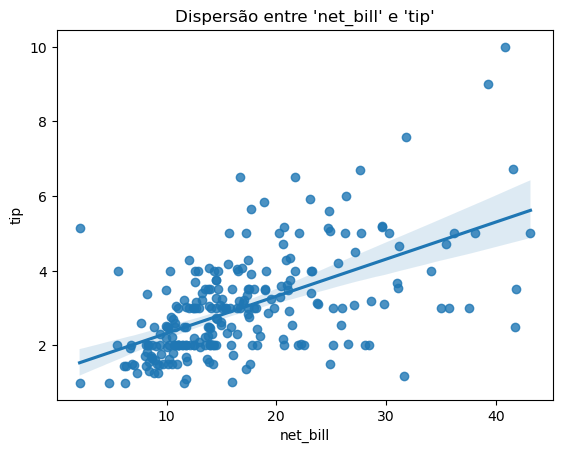

In [2]:
# Gráfico de dispersão
sns.regplot(x='net_bill', y='tip', data=tips)
plt.title("Dispersão entre 'net_bill' e 'tip'")
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.52e-06
Time:                        16:42:38   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

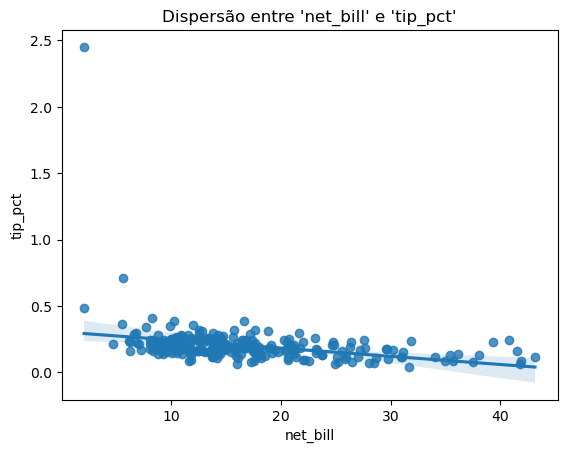

In [3]:
# Ajustar o modelo de regressão para 'tip_pct' em função de 'net_bill'
reg_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg_pct.summary())

# Gráfico de dispersão para 'tip_pct' e 'net_bill'
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.title("Dispersão entre 'net_bill' e 'tip_pct'")
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Os dois gráficos descrevem relações diferentes entre a conta líquida (ou net_bill) e as gorjetas.

O primeiro gráfico, pode ser esperado uma tendência crescente, pois à medida que a conta aumenta, é provável que a gorjeta também aumente em termos absolutos.

No segundo gráfico, a tendência pode não ser tão clara. Pode ser que clientes com contas mais altas deem uma porcentagem menor de gorjeta.

O ajuste do modelo (representado pela linha no gráfico de dispersão) no primeiro caso provavelmente seguirá mais de perto a tendência dos dados, pela relação mais direta entre conta e gorjeta.

No segundo gráfico, o ajuste pode variar mais em relação aos pontos, especialmente se a relação entre conta líquida e porcentagem de gorjeta não for tão linear.

Não é apropriado comparar diretamente os R2 dos dois modelos, pois eles descrevem relações diferentes. Um R2 mais alto em um modelo não significa necessariamente que ele é "melhor", mas apenas que ele explica uma maior proporção da variância na variável dependente.

É mais útil comparar R2s quando você está olhando para modelos que tentam prever a mesma variável dependente, mas têm diferentes variáveis independentes ou estão estruturados de maneira diferente.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [6]:
# Ajuste do modelo para tip_pct em função do net_bill
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

In [7]:
# Pegar a preditiva do valor da tip_pct.
tips['pred_tip_pct'] = reg_tip_pct.fittedvalues

In [8]:
# Pegar a preditiva do valor da gorjeta (tip)
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

In [10]:
# Calcular o R2 para 'tip'
reg_tip = smf.ols('tip ~ net_bill', data=tips).fit()
R2_tip = reg_tip.rsquared

In [11]:
# Comparar o R2 com o modelo ajustado para a gorjeta predita.
from sklearn.metrics import r2_score

R2_pred_tip = r2_score(tips['tip'], tips['pred_tip'])

In [16]:
# Impressão do modelo original e do modelo baseado na predição
print("R^2 do modelo original (tip ~ net_bill):", R2_tip)
print("R^2 com base na predição:", R2_pred_tip)

R^2 do modelo original (tip ~ net_bill): 0.3325407312323706
R^2 com base na predição: 0.10889974845461381
